In [1]:
import numpy as np
import matplotlib.pyplot as plt
import hamhelper.plotting as hp
import math
import scipy as sp

## Question 1
Plot S(T) for these particles

1.380649e-23
[7.06282194e-20 7.06507313e-20 7.06732034e-20 7.06956356e-20
 7.07180282e-20 7.07403812e-20 7.07626948e-20 7.07849689e-20
 7.08072038e-20 7.08293995e-20]
[2.23156076e-20 2.22985404e-20 2.22814971e-20 2.22644777e-20
 2.22474820e-20 2.22305101e-20 2.22135620e-20 2.21966374e-20
 2.21797365e-20 2.21628592e-20]
9.294382697543602e-20


C:\Users\hamis\AppData\Local\Temp\ipykernel_18192\4262738225.py:6: RuntimeWarning: overflow encountered in exp
  t2 = (N*E)/((Teff/k_b) * (1 + np.exp(B*E)))
C:\Users\hamis\AppData\Local\Temp\ipykernel_18192\4262738225.py:9: RuntimeWarning: overflow encountered in exp
  return N*k_b*np.log(1 + np.exp(-B*E)) + (N*E)/((Teff/k_b) * (1 + np.exp(B*E)))


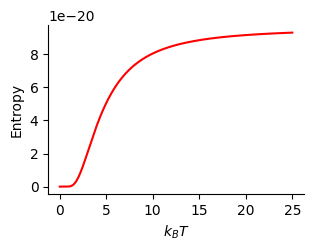

In [53]:
kB = sp.constants.k
print(kB)
def S_1(Teff, E=10, N=1e4, k_b=kB):
    B = 1/(Teff)
    t1 = N*k_b*np.log(1 + np.exp(-B*E))
    t2 = (N*E)/((Teff/k_b) * (1 + np.exp(B*E)))
    print(t1[-10:])
    print(t2[-10:])
    return N*k_b*np.log(1 + np.exp(-B*E)) + (N*E)/((Teff/k_b) * (1 + np.exp(B*E)))

x_model = np.linspace(0.01, 25, 1000)
y_model = S_1(x_model)
print(y_model[-10])

fig, ax = plt.subplots(1, 1, figsize=np.array([3.3, 2.2]))

ax.plot(x_model, y_model, 'r-')

ax.set(xlabel=r'$k_BT$', ylabel='Entropy')
hp.despine()
plt.savefig('plots/q1_s_vs_kbT.png', dpi=300)
plt.show()